In [2]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model as lm

pandas.set_option("display.precision", 2)

#datafile = '../../Data/Processed/wine/airbnb_queens_2019.csv'
datafile = '../../Data/Raw/wine/winequality-red.csv'


test_var = 'fixed acidity'

classifier_variables = ['fixed acidity', 'alcohol']
target_variable = ['quality']


analysis_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Load Data 

In [3]:
data = pandas.read_csv(datafile, sep=';')
print(data.shape)
print(data.columns)
data.head()

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


# Descrição dos Dados

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1.60e+03,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,9.97e-01,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,1.89e-03,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,9.90e-01,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,9.96e-01,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,9.97e-01,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,9.98e-01,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00e+00,4.01,2.00,14.90,8.00


# Filtering Variables 

In [5]:
data = data[analysis_variables + target_variable].copy()
n_classes = data[target_variable].nunique().values[0]
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


In [5]:
n_classes

6

# Normalização de dados 

## Standard Scaling

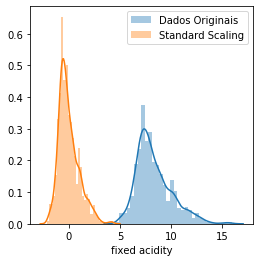

In [6]:
scaler = preprocessing.StandardScaler()
scaler.fit(data)
std_normed_data = pandas.DataFrame(scaler.transform(data), columns=data.columns)

# Plot distributions
plt.figure(figsize=(4,4))
sns.distplot(data[test_var], label='Dados Originais', )
sns.distplot(std_normed_data[test_var], label='Standard Scaling')
plt.legend()


## Normalização por Min/Max 

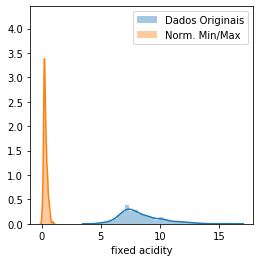

In [8]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
minmax_normed_data = pandas.DataFrame(scaler.transform(data), columns=data.columns)

# Plot distributions

plt.figure(figsize=(4,4))
sns.distplot(data[test_var], label='Dados Originais', )
sns.distplot(minmax_normed_data[test_var], label='Norm. Min/Max')
plt.legend()

# Normalização Logarítmica

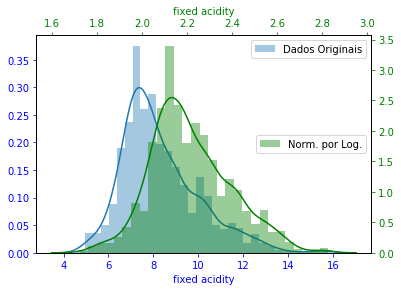

In [8]:

normed_data = data.copy()
normed_data[test_var] = np.log1p(data[test_var])

# Plot distributions
plt.figure(figsize=(6,4))
sns.distplot(data[test_var], label='Dados Originais', )
ax = plt.gca()
ax.xaxis.label.set_color('b')
ax.tick_params(axis='x', colors='b')
ax.tick_params(axis='y', colors='b')

ax2 = ax.twinx()
ax3 = ax2.twiny()
sns.distplot(normed_data[test_var],color='g', label='Norm. por Log.')
ax3.xaxis.label.set_color('g')
ax3.tick_params(axis='x', colors='g')
ax2.tick_params(axis='y', colors='g')
ax.legend()
ax3.legend(loc='center right')


# Estimativa de valor médio

Qual é o Índice médio de acidez de vinhos tintos?

In [9]:
n = 200
print('Acidez média: %.2f'%data[test_var].mean())
print('\t1)Acidez média amostral (',n,'): %.2f'%data.sample(n)[test_var].mean())
print('\t2)Acidez média amostral (',n,'): %.2f'%data.sample(n)[test_var].mean())
print('\t3)Acidez média amostral (',n,'): %.2f'%data.sample(n)[test_var].mean())

Acidez média: 8.32
	1)Acidez média amostral ( 200 ): 8.41
	2)Acidez média amostral ( 200 ): 8.34
	3)Acidez média amostral ( 200 ): 8.19


Calculando a distribuição do valor médio da população para diversos sorteios de amostras. 

Valor médio da amostra  :  8.3202276
Valor médio da população:  8.319637273295838
Erro padrão da amostra  :  0.11497306944776252
Erro padrão estimado    :  0.12311410132470275


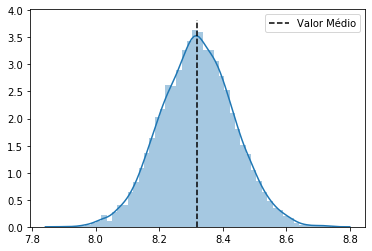

In [10]:
n_test = 10000
n = 200
mean_values = []
for i in range(n_test):
    mean_values.append(data.sample(n)[test_var].mean())
ref_mean_samples = np.array(mean_values)

print('Valor médio da amostra  : ', ref_mean_samples.mean())
print('Valor médio da população: ', data[test_var].mean())
print('Erro padrão da amostra  : ', ref_mean_samples.std())
print('Erro padrão estimado    : ', data[test_var].std() / np.sqrt(n))

# Plot
ax = sns.distplot(ref_mean_samples)
ax.plot([data[test_var].mean(), data[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()


Visualizando o impacto do tamanho da amostra para a estimativa do valor médio.

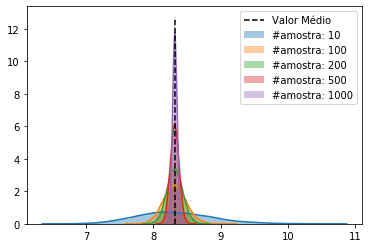

In [11]:
n_test = 10000

for ntrial in [10, 100, 200, 500, 1000]:
    mean_values = []
    for i in range(n_test):
        mean_values.append(data.sample(ntrial)[test_var].mean())
    # Plot
    ax = sns.distplot(mean_values, label='#amostra: %i'%ntrial)
ax.plot([data[test_var].mean(), data[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()



Visualizando o impacto da quantidade de testes para a estimativa do valor médio da população. 

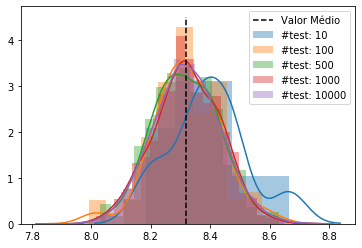

In [12]:
ntrial = 200
for n_test in [10, 100, 500, 1000, 10000]:
    mean_values = []
    for i in range(n_test):
        mean_values.append(data.sample(ntrial)[test_var].mean())
    # Plot
    ax = sns.distplot(mean_values, label='#test: %i'%n_test)
ax.plot([data[test_var].mean(), data[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()


# Bootstraping

Método de estimativa de parâmetros de uma população por bootstrapping.

In [13]:
def meanBootstrap(X, n_trials):
    mean_estimates = []
    for i in range (n_trials):
        sample = [X[j] for j in np.random.randint(len(X), size=len(X))]
    mean_estimates.append(np.mean(sample))
    return mean_estimates

m = meanBootstrap(data[test_var].values, 10000)
print("Valor médio população     :", data[test_var].mean())
print("Estimativa amostral (200) :", data.sample(200)[test_var].mean())
print("Estimativa bootstrap      :", np.mean(m))

Valor médio população     : 8.319637273295838
Estimativa amostral (200) : 8.338500000000005
Estimativa bootstrap      : 8.352095059412132


# Intervalo de Confiança 

Estimativa do intervalo de confiança por aproximação Normal.

Valor médio população :  8.319637273295838
Média amostral        :  8.3202276
Intervalo de confiança:  (8.23429688066657, 8.404977665925106)


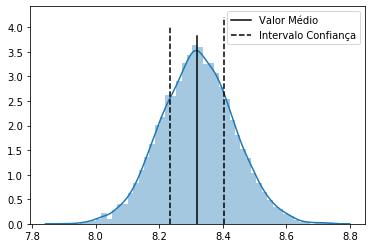

In [14]:
mean_val = data[test_var].mean()
standard_error = data[test_var].std() / np.sqrt(data.shape[0])
ci = (mean_val - standard_error*1.96, mean_val + standard_error*1.96)
print('Valor médio população : ', mean_val)
print('Média amostral        : ', ref_mean_samples.mean())
print('Intervalo de confiança: ', ci)

ax = sns.distplot(ref_mean_samples)
ax.plot([mean_val, mean_val], ax.axis()[2:], '-k', label='Valor Médio')
ax.plot([ci[0], ci[0]], ax.axis()[2:], '--k', label='Intervalo Confiança')
ax.plot([ci[1], ci[1]], ax.axis()[2:], '--k',)
ax.legend()

# Teste de Hipóteses 

## Por Intervalo de Confiança 

Número de sorteios fora do I.C.   :  8 em 200
Proporção de sorteios fora do I.C.: 4.0 %


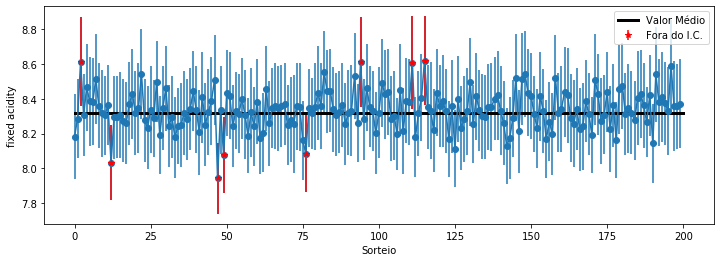

In [15]:
n_test = 200
ntrial = 200

mean_values = []
conf_values = []
for i in range(n_test):
    data_sample = data.sample(ntrial)[test_var]
    mean_values.append(data_sample.mean())
    standard_error = data_sample.std() / np.sqrt(ntrial)
    conf_values.append([standard_error*1.96, standard_error*1.96])

mean_values = np.array(mean_values)
conf_values = np.array(conf_values).T 
idx = ((data[test_var].mean() < (mean_values - conf_values[0])) |
       (data[test_var].mean() > (mean_values + conf_values[1])))
x_trials = np.arange(n_test)

print('Número de sorteios fora do I.C.   : ', idx.sum(), 'em', idx.shape[0])
print('Proporção de sorteios fora do I.C.: %.1f'%(idx.sum()/idx.shape[0] * 100),'%')

# Plot
plt.figure(figsize=(12,4))
plt.errorbar(x_trials, mean_values, yerr=conf_values, marker='o')
plt.errorbar(x_trials[idx], mean_values[idx], yerr=conf_values[:, idx],
             marker='*',color='r', linestyle='', label='Fora do I.C.')
plt.plot([0, n_test], [data[test_var].mean(), data[test_var].mean()],
        '-k',lw=3, label='Valor Médio')
plt.xlabel('Sorteio')
plt.ylabel(test_var)
plt.legend()

Hipotese HA: Vinhos de Baixa e Alta Qualidade se Comportam Diferente sob a Variável Testada 

In [16]:
if n_classes == 2:
    class_lo = data[data.quality <= 5].copy()
    class_up = data[data.quality  > 5].copy()

    class_lo_mean = class_lo[test_var].mean()
    class_lo_ci   = class_lo[test_var].std()/np.sqrt(class_lo.shape[0]) * 1.96


    print('Classe Notas Altas : %.4f'%class_up[test_var].mean())
    print('Classe Notas Baixas: %.4f'%class_lo_mean)
    print('\tI.C.: de %.4f'%(class_lo_mean - class_lo_ci), ' a %.4f'%(class_lo_mean + class_lo_ci))

    sns.distplot(class_lo[test_var], label='Baixa Qualidade')
    sns.distplot(class_up[test_var], label='Alta Qualidade')
    plt.legend()

## Por p-valor 

Qual é a probabilidade de que a diferença de acidez do vinho seja sorte?

In [17]:
if n_classes==2:
    test_var_lo = class_lo[test_var].values
    test_var_up = class_up[test_var].values
    mean_diff = np.abs(test_var_up.mean() - test_var_lo.mean())

    # pooling distributions
    pool = np.concatenate([test_var_up, test_var_lo])
    np.random.shuffle(pool)

    #sample generation

    N = 10000 # number of samples
    n = np.min([test_var_up.shape[0], test_var_lo.shape[0]])
    diff = [0]*N
    for i in range(N):
        p1 = [np.random.choice(pool) for _ in range(n)]
        p2 = [np.random.choice(pool) for _ in range(n)]
        diff[i] = np.abs(np.mean(p1) - np.mean(p2))


    # counting differences larger than the observed one
    diff2 = np.array(diff)
    w1 = np.where(diff2 > mean_diff)[0]

    p_value = len(w1)/float(N)

    print('Simulação do p-valor: ', p_value)
    print('Diferença: ', mean_diff)

    if p_value < 0.05:
        print('O efeito observado é provável')
    else:
        print('O efeito é improvável')    

# Regressão Logística 

In [29]:
#classifier_variables = ['price', 'minimum_nights']
#target_variable = ['room_type']

classifier_variables = ['fixed acidity', 'alcohol']
target_variable = ['quality']

n_classes = data[target_variable].nunique().values[0]

#está certo esse scale?
x_data = preprocessing.scale(data[classifier_variables].copy().values)
y_data = data[target_variable].copy().values
if n_classes == 2:
    y_data[y_data <= 5] = 0
    y_data[y_data  > 5] = 1


cat_encoder = preprocessing.OrdinalEncoder()
cat_encoder.fit(y_data)
y_data = cat_encoder.transform(y_data)
y_data = y_data.reshape(-1)


model = lm.LogisticRegression(solver='lbfgs')
model.fit(x_data, y_data)

if n_classes == 2:
    y_hat = model.predict_proba(x_data)[:,1]
else:
    y_hat = model.predict_proba(x_data)



## Plot Distribution 

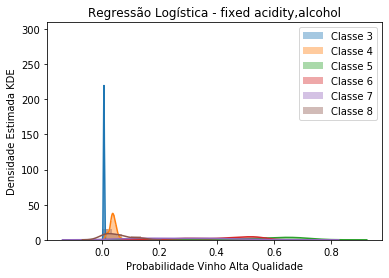

In [25]:
for i in range(n_classes):
    sns.distplot(y_hat[y_data == i, i], label='Classe '+str(cat_encoder.categories_[0][i]))

plt.title('Regressão Logística - ' + ','.join(classifier_variables))
plt.ylabel('Densidade Estimada KDE')
plt.xlabel('Probabilidade Vinho Alta Qualidade')

plt.legend()

## Matriz de Confusão

In [28]:

if n_classes == 2:
    y_decision = y_hat > 0.5
else:
    y_decision = np.argmax(y_hat, axis=1)

col_names = ['Model ' + str(s) for s in cat_encoder.categories_[0]]
idx_names = ['Real ' + str(s) for s in cat_encoder.categories_[0]]

cmat = metrics.confusion_matrix(y_data, y_decision)
cmat = pandas.DataFrame(cmat, index=idx_names,
                              columns=col_names)
cmat['Real Total'] = cmat.sum(axis=1)
cmat.loc['Model Total',:] = cmat.sum(axis=0)
cmat = cmat.astype(int)

cmat

,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Real Total
Real 3,0,0,7,3,0,0,10
Real 4,0,0,31,22,0,0,53
Real 5,0,0,522,153,6,0,681
Real 6,0,0,257,351,30,0,638
Real 7,0,0,17,157,25,0,199
Real 8,0,0,1,10,7,0,18
Model Total,0,0,835,696,68,0,1599
